#Import Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import Datasets

In [4]:
customers =pd.read_csv("/content/sample_data/Customers.csv")
product =pd.read_csv("/content/sample_data/Products.csv")
transactions =pd.read_csv("/content/sample_data/Transactions.csv")

#Cleaning customers datasets

In [23]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
customers.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [27]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [14]:
customers.drop_duplicates(inplace=True)

#Cleaning Products datasets

In [17]:
product.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [18]:
product.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [28]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [36]:
product.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


#Cleaning transaction datasets

In [29]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [32]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [33]:
transactions.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [35]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


#Visualization

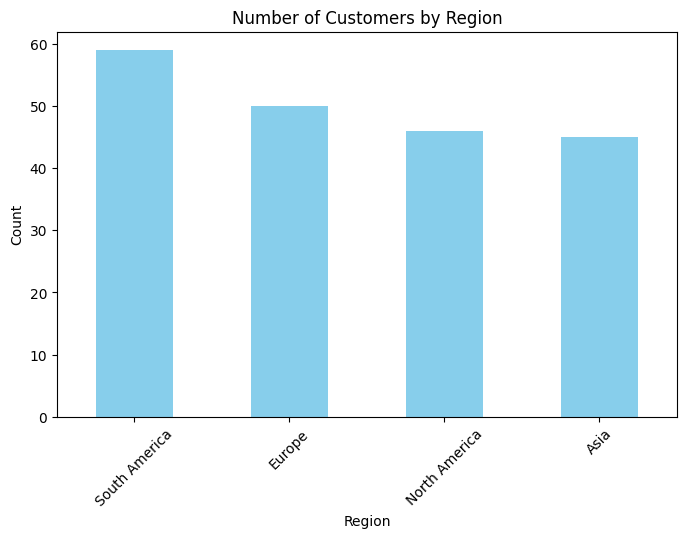

In [39]:
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Number of Customers by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

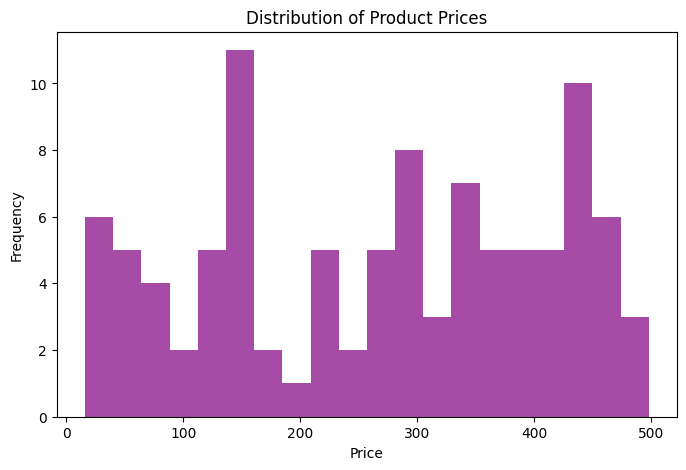

In [41]:
product['Price'].plot(kind='hist', bins=20, color='purple', alpha=0.7, figsize=(8, 5))
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

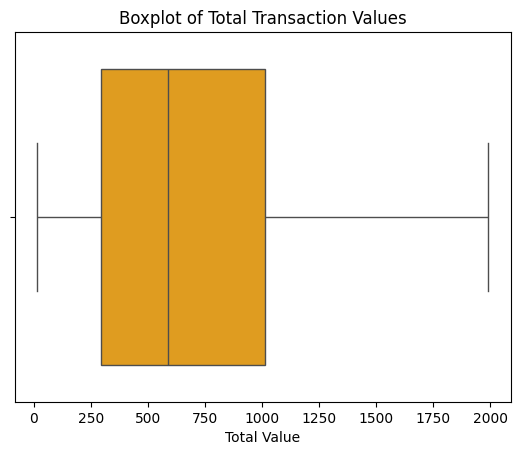

In [43]:
sns.boxplot(x=transactions['TotalValue'], color='orange')
plt.title("Boxplot of Total Transaction Values")
plt.xlabel("Total Value")
plt.show()

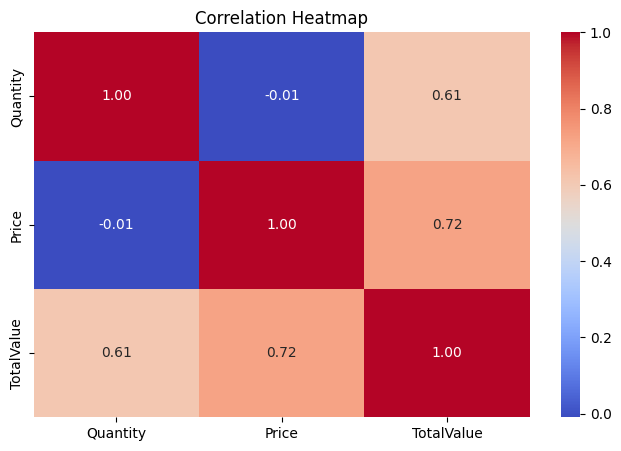

In [44]:
numeric_cols = transactions[['Quantity', 'Price', 'TotalValue']]
correlation = numeric_cols.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

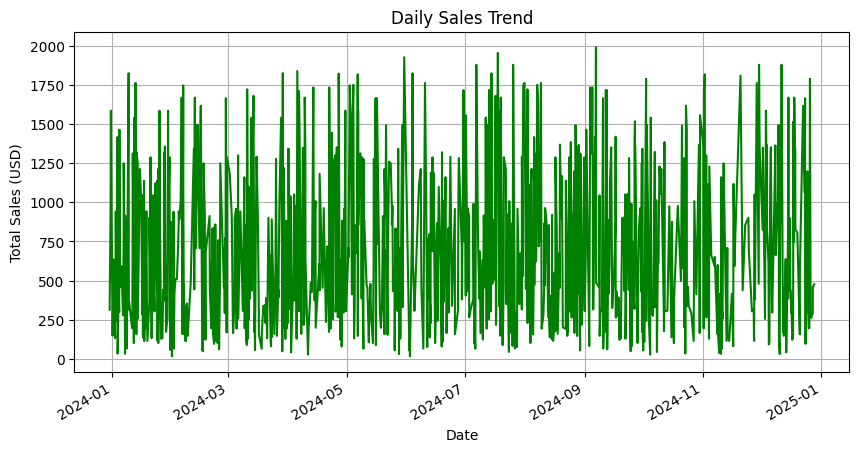

In [45]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
daily_sales = transactions.groupby('TransactionDate')['TotalValue'].sum()

plt.figure(figsize=(10, 5))
daily_sales.plot(kind='line', color='green')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()

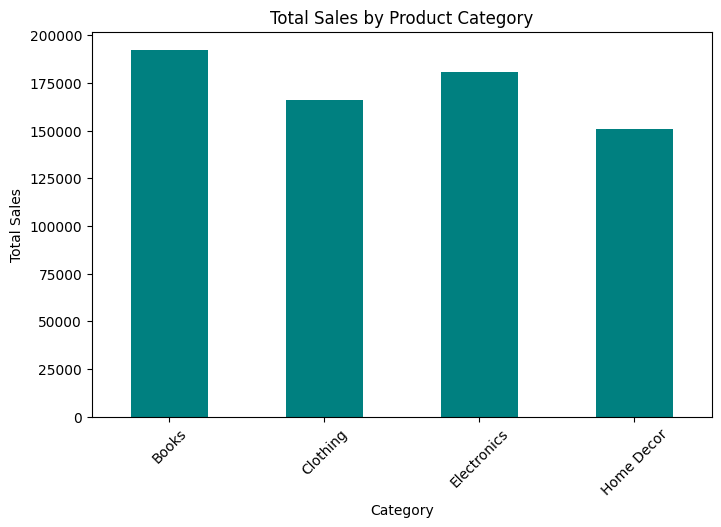

In [48]:
merged_data = transactions.merge(product, on='ProductID')
category_sales = merged_data.groupby('Category')['TotalValue'].sum()

category_sales.plot(kind='bar', color='teal', figsize=(8, 5))
plt.title("Total Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

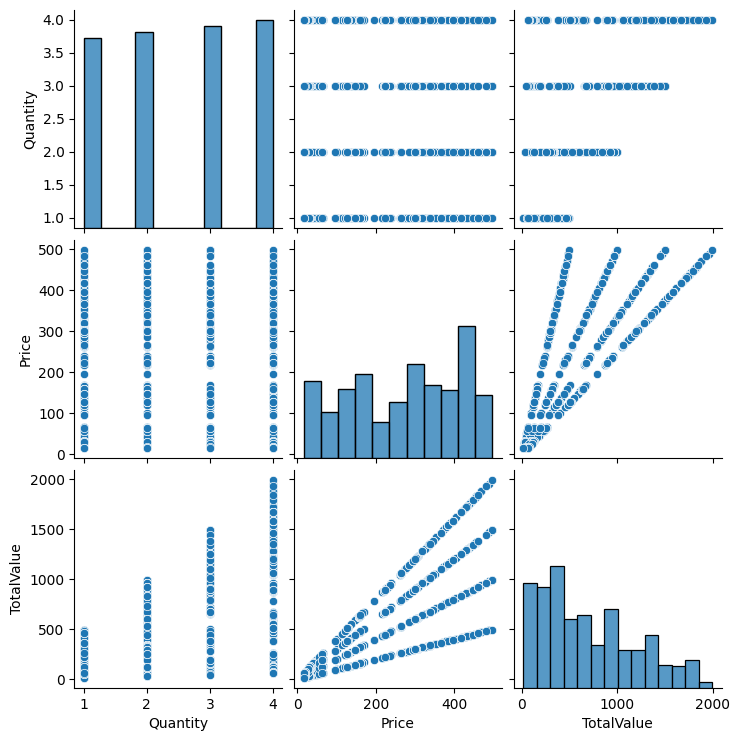

In [49]:
sns.pairplot(transactions[['Quantity', 'Price', 'TotalValue']])
plt.show()

In [53]:
merged_data = transactions.merge(product, on='ProductID')
merged_data = merged_data.merge(customers, on='CustomerID')

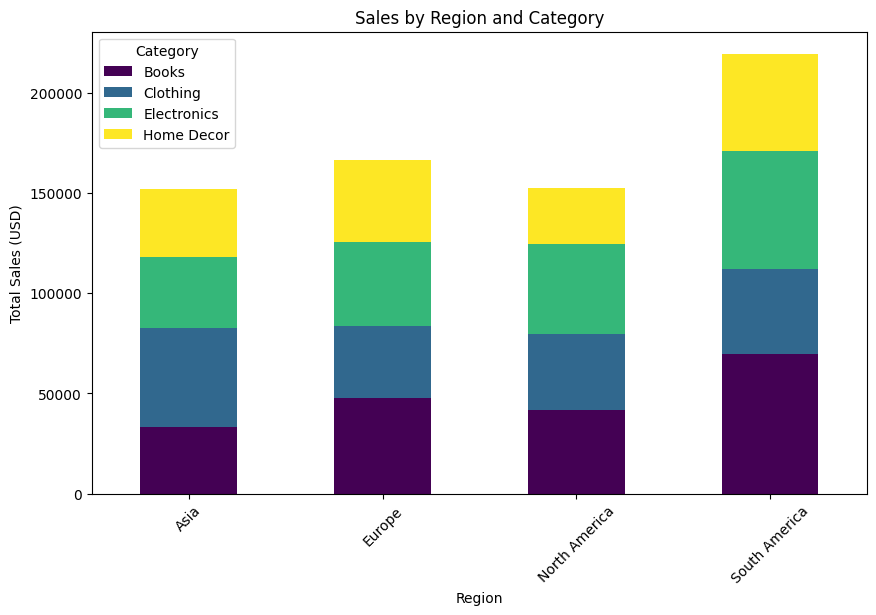

In [54]:
region_category_sales = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()

region_category_sales.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Sales by Region and Category")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.legend(title="Category")
plt.xticks(rotation=45)
plt.show()